# CPSC 103 Project: Video Game Sales

In [13]:
from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

##################
# Data Definitions

Region = Enum('Region', ['na', 'eu', 'jp', 'ot', 'gl'])
# interp. one of the regions north america 'na', europe 'eu',
# japan 'jp', other 'ot', or global 'gl'

# examples are redundant for Enumeration

# @typecheck
# def fn_for_region(r: Region) -> ...:
#     # template based on Enumeration
#     if r == Region.na:
#         return ...
#     elif r == Region.eu:
#         return ...
#     elif r == Region.jp:
#         return ...
#     elif r == Region.ot:
#         return ...
#     elif r == Region.gl:
#         return ...

    
VideoGame = NamedTuple('VideoGame', [('plat', str),
                                    ('genre', str),
                                    ('pub', str),
                                    ('na_sales', float), # in range [0,...)
                                    ('eu_sales', float), # in range [0,...)
                                    ('jp_sales', float), # in range [0,...)
                                    ('ot_sales', float), # in range [0,...)
                                    ('gl_sales', float)]) # in range [0,...)
# interp. a video game with a platform, genre, publisher ('pub'), North American sales,
# European sales, Japanese sales, other sales ('ot_sales') and global sales ('gl_sales')
# where all sales are in millions

VG1 = VideoGame('Wii', 'Sports', 'Nintendo', 41.49, 29.02, 3.77, 8.46, 82.74)
VG2 = VideoGame('NES', 'Platform', 'Nintendo', 29.08, 3.58, 6.81, 0.77, 40.24)

# @typecheck
# def fn_for_video_game(vg: VideoGame) -> ...:
#     # template based on Compound
#     return ...(vg.plat,
#               vg.genre,
#               vg.pub,
#               vg.na_sales,
#               vg.eu_sales,
#               vg.jp_sales,
#               vg.ot_sales,
#               vg.gl_sales)


# List[VideoGame]
# interp. a list of VideoGames

LOVG0 = []
LOVG1 = [VG1, VG2]
LOVG2 = [VG2]

# @typecheck
# def fn_for_lovg(lovg: List[VideoGame]) -> ...:
#     # template based on arbitrary-sized and the reference rule
#     # desc of the accumulator
#     acc = ... # type: ...
#     for vg in lovg:
#         return ...(fn_for_video_game(vg), acc)
#     return ...(acc)


# List[float]
# interp. a list of floats representing video game sales in millions

LOF0 = []
LOF1 = [0.0, 3.1415]
LOF2 = [23.3, 2.0, 21.43]

# @typecheck
# def fn_for_lof(lof: List[float]) -> ...:
#     # template based on arbitrary-sized
#     # description of acc
#     acc = ... # type: ...
#     for f in lof:
#         acc = ...(f, acc)
#     return ...(acc)

# List[List[float]]
# interp. a list of a list of floats representing video game sales in millions

LOLOF0 = [[]]
LOLOF1 = [[1.2,2.3,3.4], [3.2, 1.2, 4.3]]
LOLOF2 = [[0.2,.4], [32.1, 32.1]]

# @typecheck
# def fn_for_lolof(lolof: List[List[float]]) -> ...:
#     # template based on arbitrary sized and the reference rule
#     # description of the accumulator
#     acc = ... # type: ...
#     for lof in lolof:
#         acc = ...(fn_for_lof(lof), acc)
#     return ...(acc)


# List[str]
# interp. a list of strings

LOS0 = []
LOS1 = ['yall', 'see', 'that', 'new', 'wandavision?']
LOS2 = ['that', 'show', 'slapped']

# @typecheck
# def fn_for_los(los: List[str]) -> ...:
#     # template based on arbitrary-sized
#     # description of the accumulator
#     acc = ...      # type: ...
#     for s in los:
#         acc = ...(s, acc)

#     return ...(acc)

## Function Building

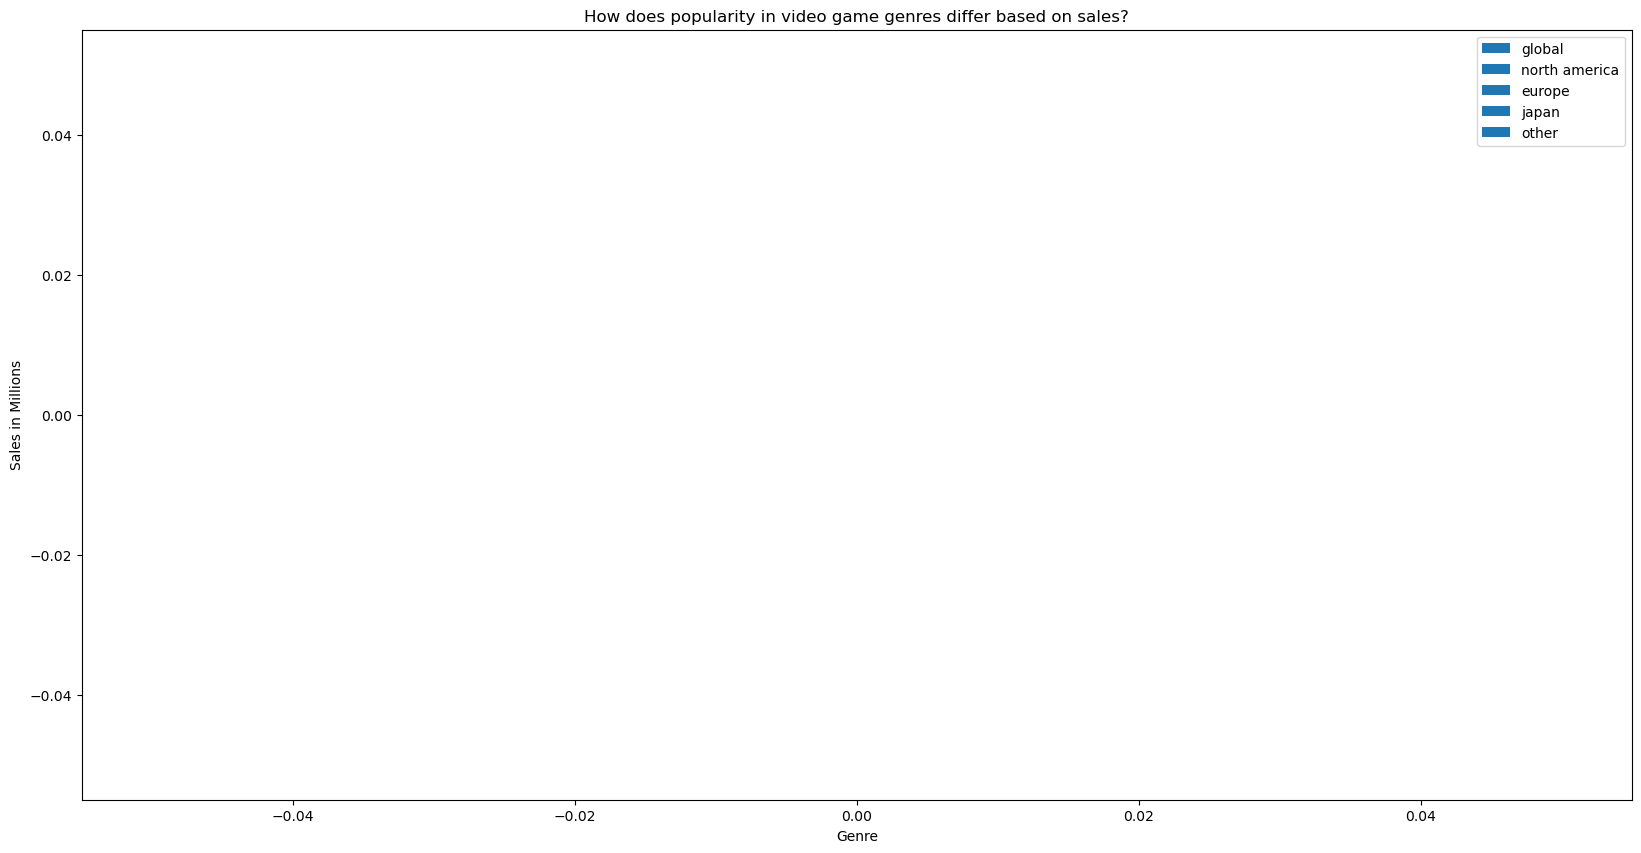

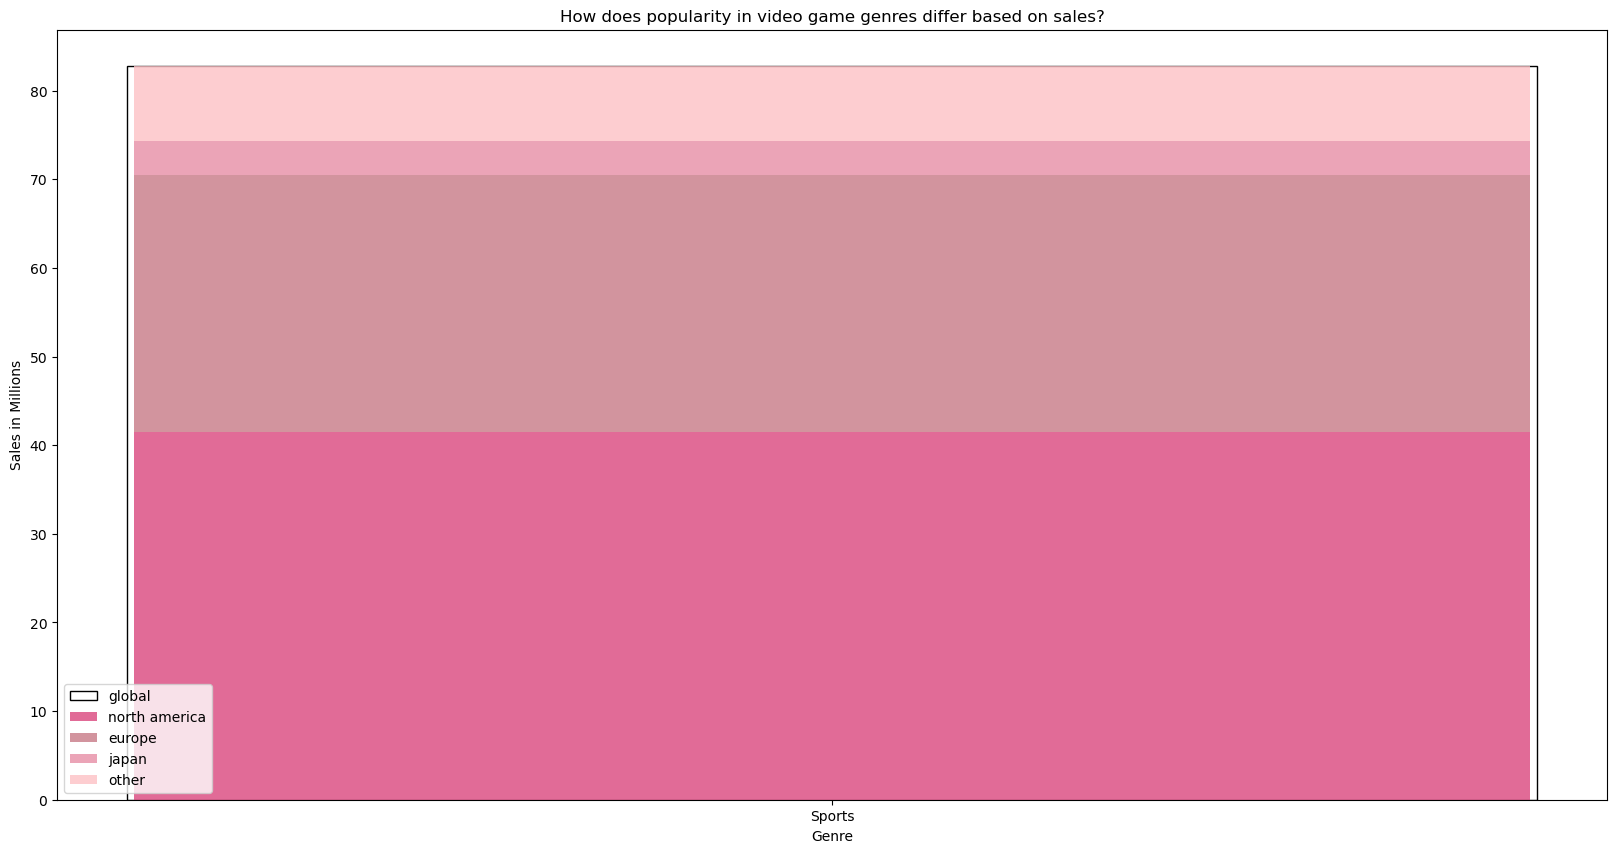

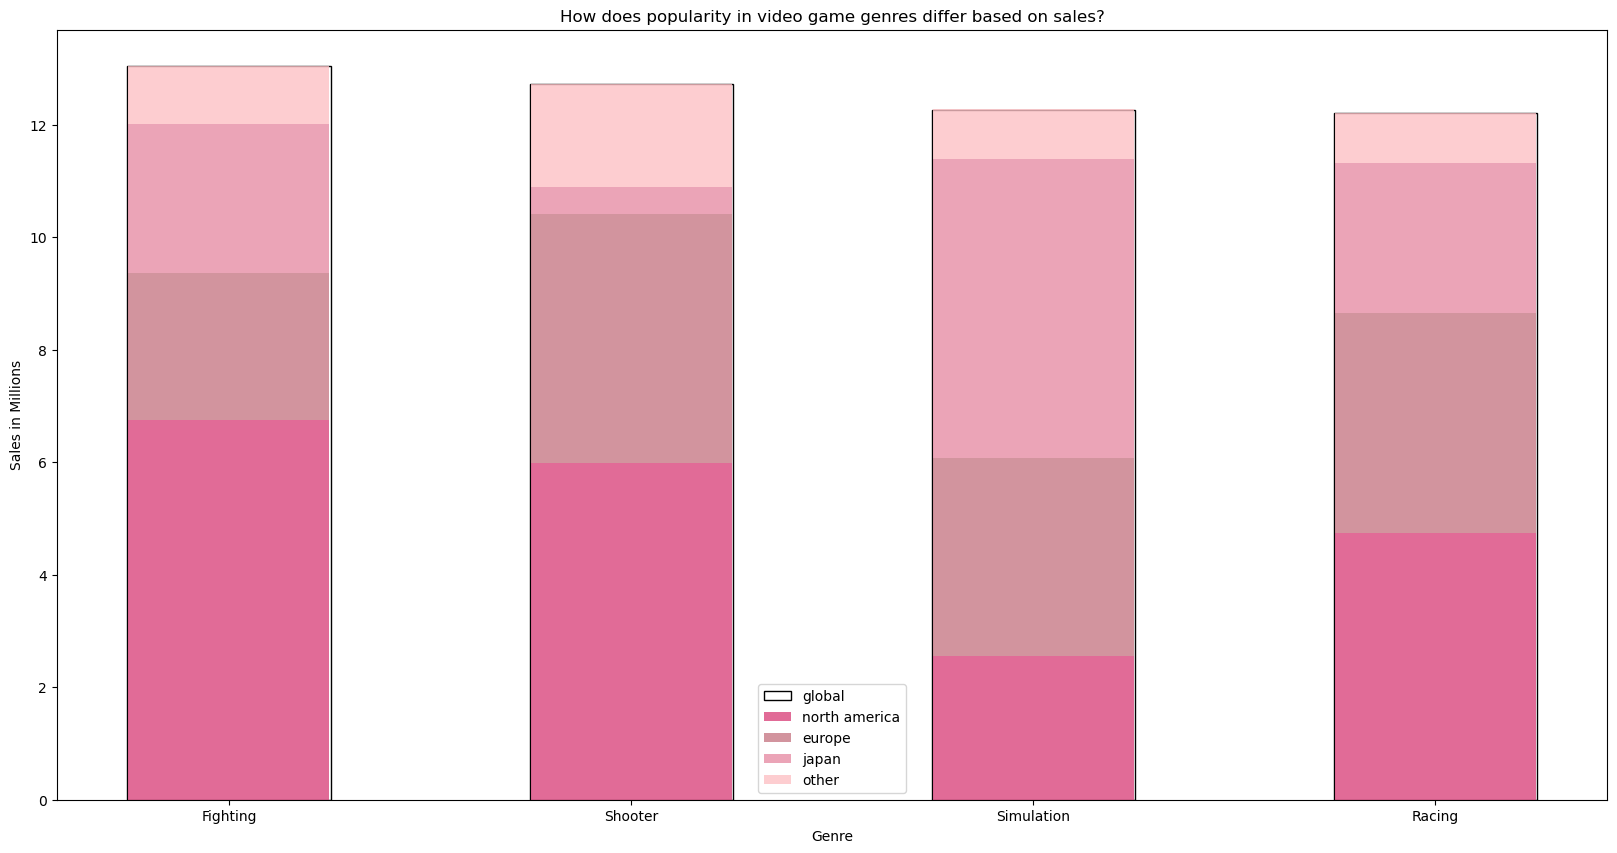

3 of 3 tests passed
3 of 3 tests passed


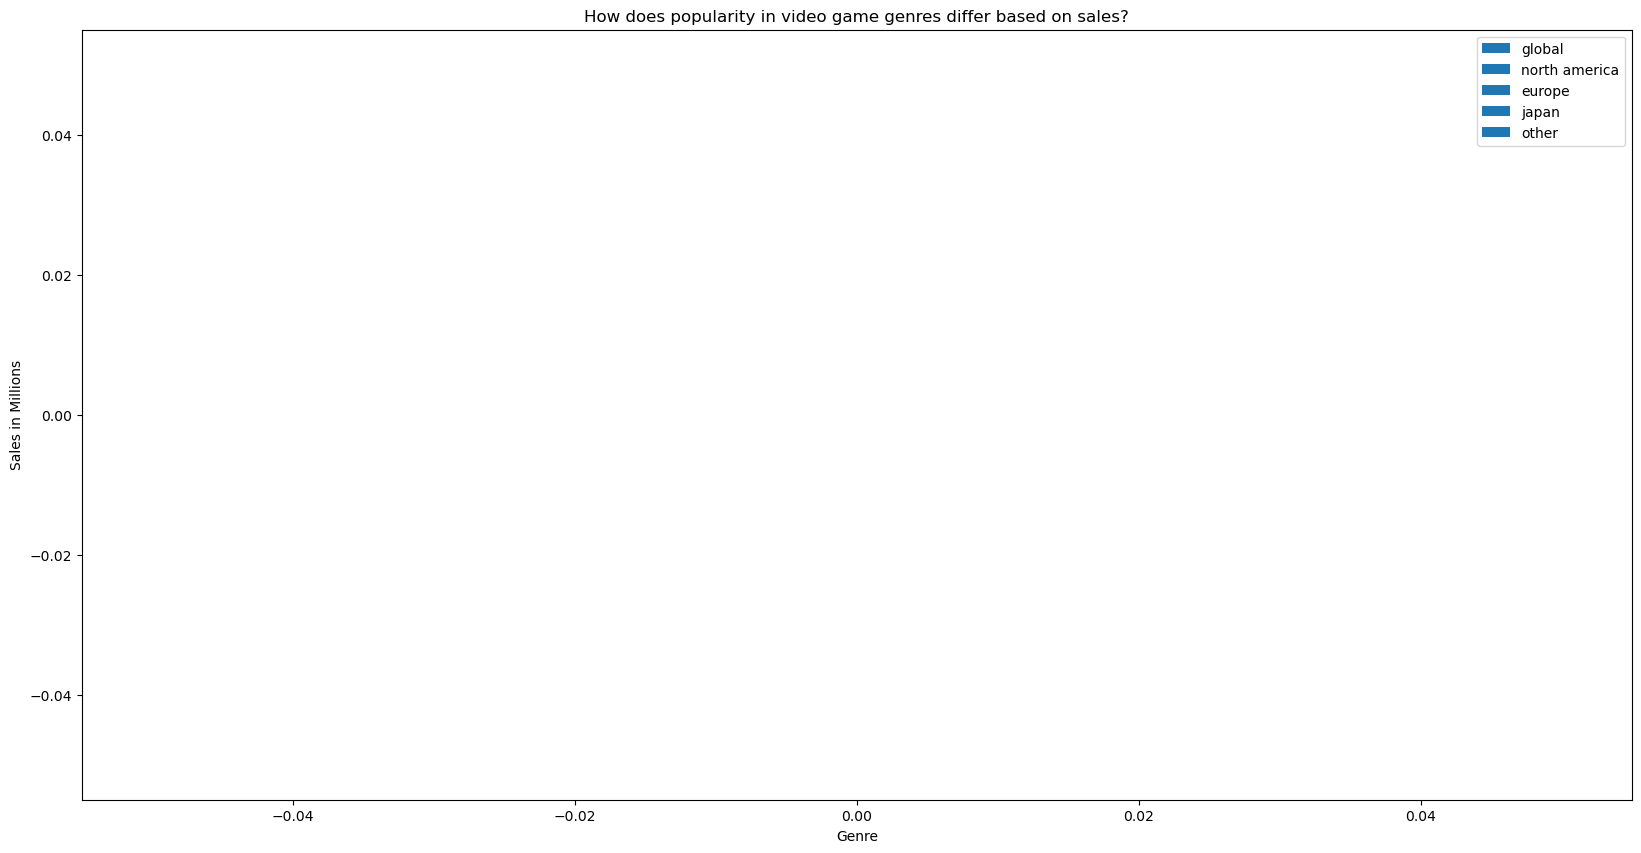

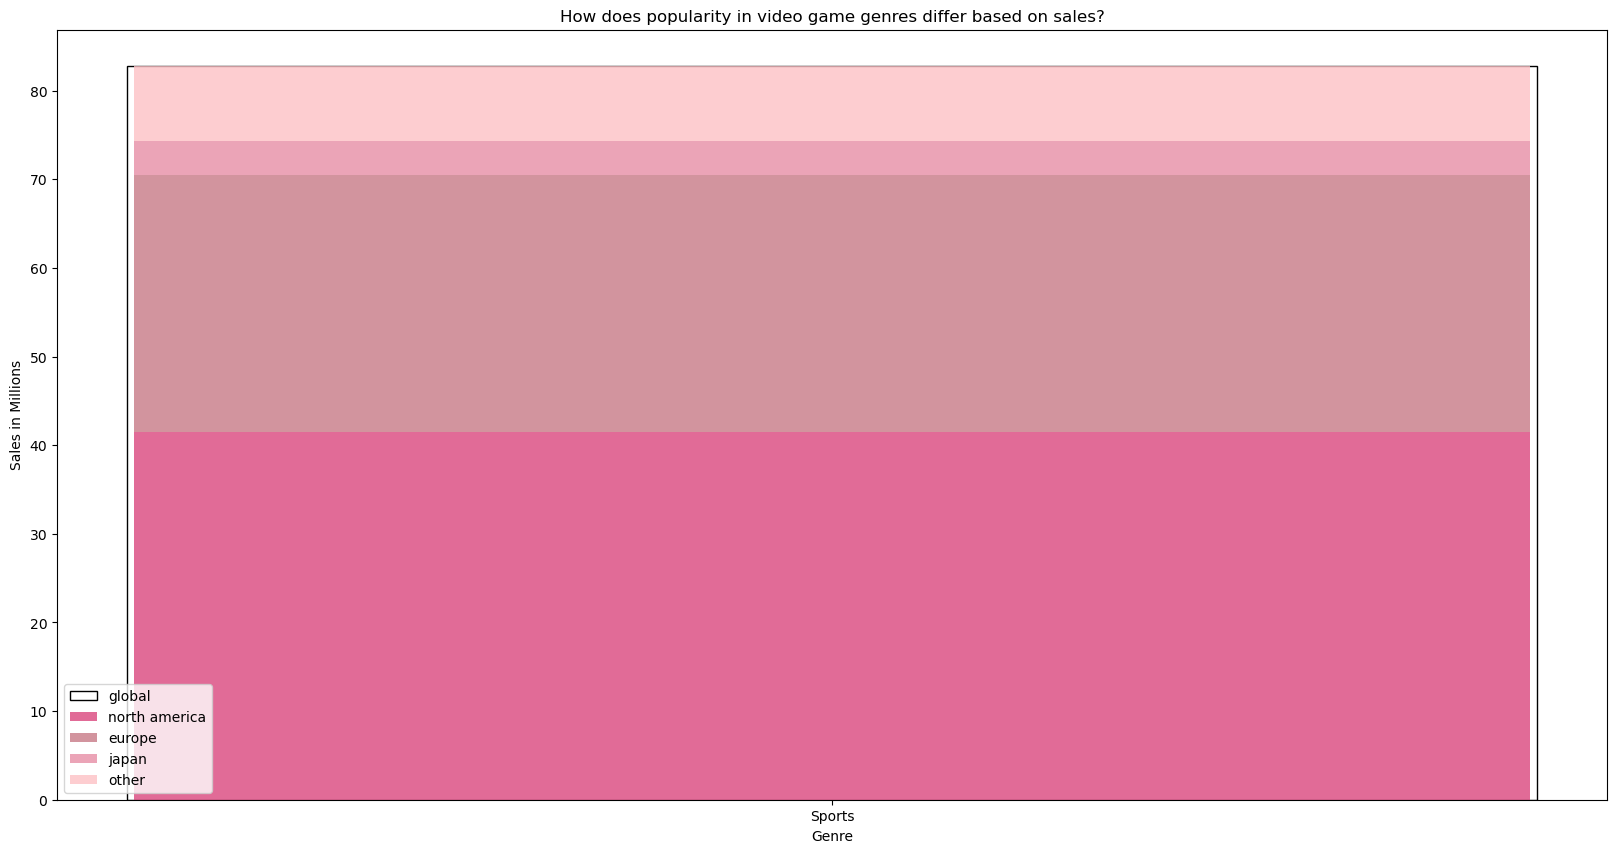

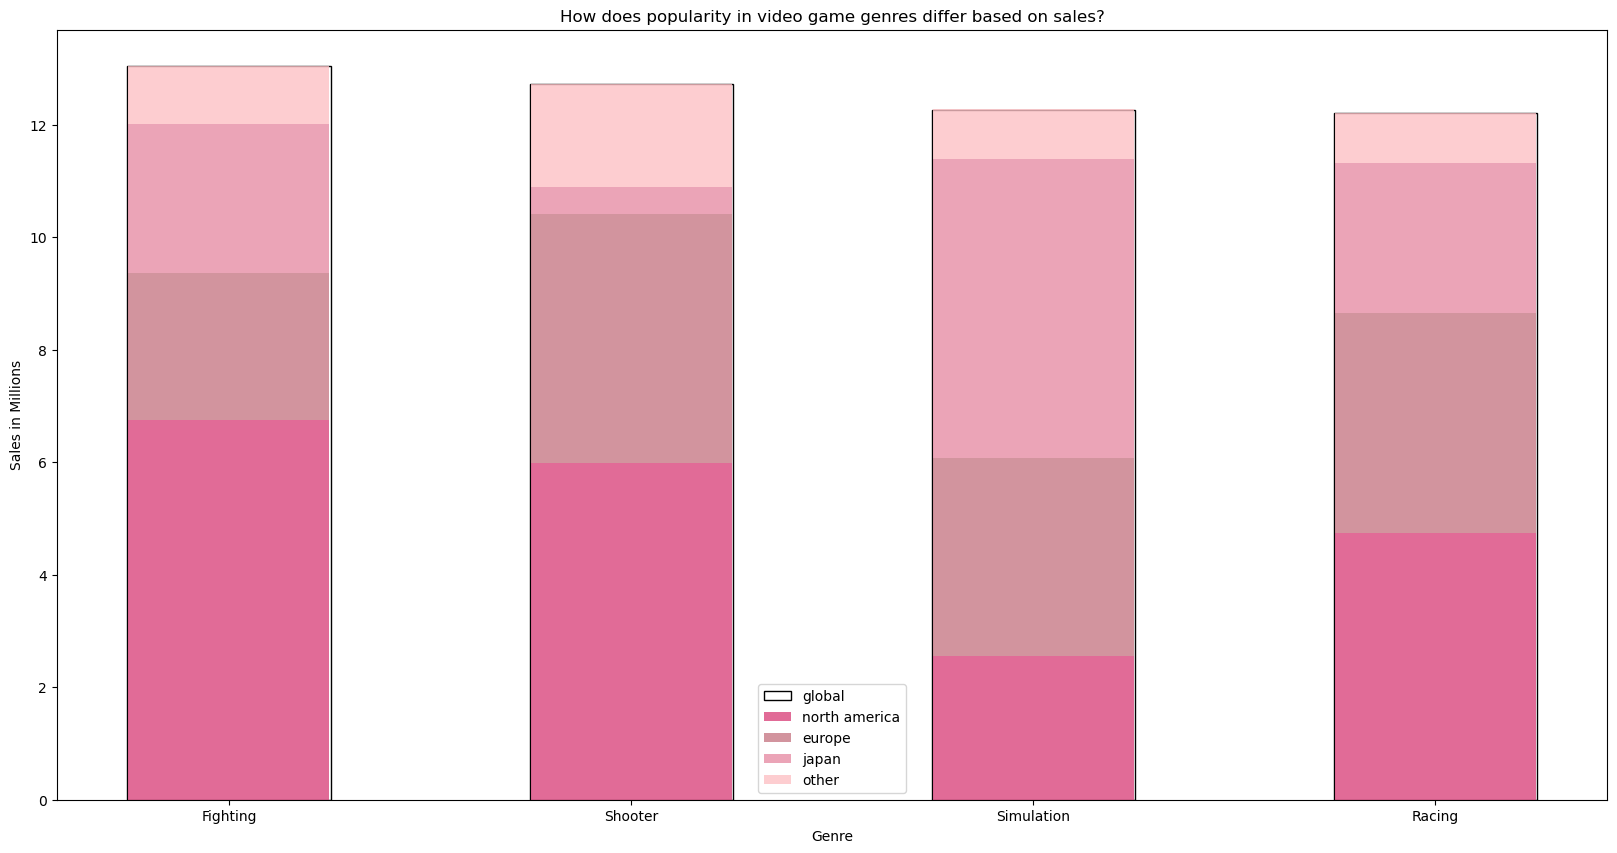

3 of 3 tests passed
4 of 4 tests passed
6 of 6 tests passed
4 of 4 tests passed
6 of 6 tests passed
3 of 3 tests passed
5 of 5 tests passed


In [28]:
@typecheck
def main(filename: str) -> None:
    """
    reads the file from given filename, analyzes the data,
    returns a stacked bar chart of video game genres vs their
    popularity based on sales colour coded by region
    """
    # return None #stub
    # Template from HtDAP, based on function composition
    
    return display_bar_chart(read(filename)) 


@typecheck
def read(filename: str) -> List[VideoGame]:
    """    
    reads information from the specified file and returns
    a list of video games
    """
    # return []  #stub
    # Template from HtDAP
    
    # lovg contains the result so far
    lovg = [] # type: List[VideoGame]

    with open(filename, encoding="utf-8") as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # only stores columns 2, 4-10
            vg = VideoGame(row[2], row[4], row[5], parse_float(row[6]),
                           parse_float(row[7]), parse_float(row[8]), 
                           parse_float(row[9]), parse_float(row[10]))
            lovg.append(vg)

    return lovg

@typecheck
def display_bar_chart(lovg: List[VideoGame]) -> None:
    """
    displays a bar chart of video game genres vs their
    popularity based on sales from lovg
    """
    # return None # stub
    # template based on visualization
    
    # genres is the x-axis
    genres = total_genres(lovg)
    
    # sales is the y-axis, converted to a numpy array
    # for calculation purposes when stacking bars
    sales = np.array(all_sales(lovg))
    
    # set bar chart options
    opacity = 0.8
    bar_width = 0.5
    
    # plot the graph with all the sales
    fig, axs = plt.subplots(figsize=(20,10))
    b1 = plt.bar(genres, sales[0], bar_width+0.005, color='w',
                 edgecolor='black', alpha=opacity+0.2, label='global')
    b2 = plt.bar(genres, sales[1], bar_width, 
                 alpha=opacity, color='xkcd:darkish pink', label='north america')
    b3 = plt.bar(genres, sales[2], bar_width, alpha=opacity,
                 color='xkcd:old pink', bottom=sales[1], label='europe')
    b4 = plt.bar(genres, sales[3], bar_width, alpha=opacity, 
                 color='xkcd:pig pink', bottom=(sales[2]+sales[1]), label='japan')
    b5 = plt.bar(genres, sales[4], bar_width, alpha=opacity, 
                 color='xkcd:pale rose', bottom=(sales[3]+sales[2]+sales[1]), label='other')
    
    # set the labels, title, legend
    plt.xlabel('Genre')
    plt.ylabel('Sales in Millions')
    plt.title('How does popularity in video game genres differ based on sales?')
    plt.legend()
    
    plt.show()
    

@typecheck
def all_sales(lovg: List[VideoGame]) -> List[List[float]]:
    """
    returns a 2d list of all sales for each genre in every region,
    in the order: global, north america, europe, japan, other
    """
    # return [] # stub
    # template from List[VideoGame]
    
    regions = [Region.gl, Region.na, Region.eu,
              Region.jp, Region.ot]
    
    # sales is the list of sales in each region so far
    sales = [] # type: List[List[float]]
    for r in regions:
        sales.append(sales_in_region(lovg, r))
    return sales


@typecheck
def sales_in_region(lovg: List[VideoGame], r: Region) -> List[float]:
    """
    returns a list of sales in millions in the given
    region for each genre available in the list of video games given
    """
    # return [] # stub
    # template from List[VideoGame] with additional parameter r
    
    genre = total_genres(lovg)
    
    # sales is the list of sales per genre so far
    sales = [] # type: List[float]
    for g in genre:
        sales.append(sales_for_genre_location(lovg, g, r))
    return sales


@typecheck
def total_genres(lovg: List[VideoGame]) -> List[str]:
    """    
    returns a list of all available video game genres in the
    order they appear
    """
    # return []  #stub
    # Template from List[VideoGame]
    # los contains the list so far
    los = [] # type: List[str]
    for vg in lovg:
        if vg.genre not in los:
            los.append(vg.genre)
    return los


@typecheck
def sales_for_genre_location(lovg: List[VideoGame], genre: str, r: Region) -> float: 
    """
    returns the total amount of sales in millions for the given
    video game genre in the given region
    """
    # return 0.0 # stub
    # template from List[VideoGame] with additional parameters genre and r
    
    # sales is the total amt of sales money so far
    
    sales = 0.0 # type: float
    for vg in lovg:
        if is_genre(vg, genre):
            sales += regional_sales(vg, r)
    return sales

@typecheck
def is_genre(vg: VideoGame, genre: str) -> bool:
    """
    returns True if the video game is within the given genre,
    False otherwise. Non-case sensitive.
    """
    # template from VideoGame with additional parameter genre
    # return True # stub
    
    return (vg.genre).lower() == genre.lower()

@typecheck
def regional_sales(vg:VideoGame, r: Region) -> float:
    """
    returns the sales of a video game from a
    given Region
    """
    # template from VideoGame and Region
    # return 3.14 # stub
    
    if r == Region.na:
        return vg.na_sales
    elif r == Region.eu:
        return vg.eu_sales
    elif r == Region.jp:
        return vg.jp_sales
    elif r == Region.ot:
        return vg.ot_sales
    elif r == Region.gl:
        return vg.gl_sales
    
###########################################
# BEGIN TESTS #############################
###########################################

start_testing()

# Examples and tests for main
expect(main('empty.csv'), None)
# Should show an empty graph, with the x-axis labelled 'Genre'
# and the y-axis labelled 'Sales in Millions'

expect(main('testdata1.csv'), None)
# Should look vaguely like this, with the x-axis labelled 'Genre'
# and the y-axis labelled 'Sales in Millions' and colour coded bars
# based on region that go orange, yellow, green, blue from bottom to top
#     |
# 100 |
#     |
#     |  *
#     |  *
#     |  *
#  50 |  *
#     |  *
#     |  *
#     |  *
#     |  *
#     +-------------
#       Sports

expect(main('testdata2.csv'), None)
# Should look vaguely like this, with the x-axis labelled 'Genre'
# and the y-axis labelled 'Sales in Millions'and colour coded bars
# based on region that go orange, yellow, green, blue from bottom to top
#
#     |
#  15 |
#     |
#     |  *
#     |  *            *                   
#     |  *            *                   
#     |  *            *         *         *
#     |  *            *         *         *
#     |  *            *         *         *
#     |  *            *         *         *
#     |  *            *         *         *
#     +-----------------------------------------
#       Fighting   Shooter  Simulation  Racing


summary()

start_testing()

# Examples and tests for read
expect(read('empty.csv'), [])
expect(read('testdata1.csv'), [VideoGame('Wii', 'Sports', 'Nintendo', 41.49, 29.02, 3.77, 8.46, 82.74)])
expect(read('testdata2.csv'), [VideoGame('Wii', 'Fighting', 'Nintendo', 6.75, 2.61, 2.66, 1.02, 13.04),
                               VideoGame('PS3', 'Shooter', 'Activision', 5.98, 4.44, 0.48, 1.83, 12.73),
                               VideoGame('DS', 'Simulation', 'Nintendo', 2.55, 3.52, 5.33, 0.88, 12.27),
                               VideoGame('3DS', 'Racing', 'Nintendo', 4.74, 3.91, 2.67, 0.89, 12.21)])

LOVG3 = read('testdata2.csv')
LOVG4 = read('testdata1.csv')

# show testing summary
summary()

start_testing()

# Examples and test for display_bar_chart()
expect(display_bar_chart([]), None)
# Should show an empty graph, with the x-axis labelled 'Genre'
# and the y-axis labelled 'Sales in Millions'

expect(display_bar_chart(LOVG4), None)
# Should look vaguely like this, with the x-axis labelled 'Genre'
# and the y-axis labelled 'Sales in Millions' and colour coded bars
# based on region that go orange, yellow, green, blue from bottom to top
#
#     |
# 100 |
#     |
#     |  *
#     |  *
#     |  *
#  50 |  *
#     |  *
#     |  *
#     |  *
#     |  *
#     +-------------
#       Sports

expect(display_bar_chart(LOVG3), None)
# Should look vaguely like this, with the x-axis labelled 'Genre'
# and the y-axis labelled 'Sales in Millions' and colour coded bars
# based on region that go orange, yellow, green, blue from bottom to top
#
#     |
#  15 |
#     |
#     |  *
#     |  *            *                   
#     |  *            *                   
#     |  *            *         *         *
#     |  *            *         *         *
#     |  *            *         *         *
#     |  *            *         *         *
#     |  *            *         *         *
#     +-----------------------------------------
#       Fighting   Shooter  Simulation  Racing

summary()

start_testing()

expect(all_sales(LOVG3), [[13.04, 12.73, 12.27, 12.21],
                          [6.75, 5.98, 2.55, 4.74],
                          [2.61, 4.44, 3.52, 3.91],
                          [2.66, 0.48, 5.33, 2.67],
                          [1.02, 1.83, 0.88, 0.89]])
expect(all_sales(LOVG4), [[82.74], [41.49], [29.02], [3.77], [8.46]])
expect(all_sales(LOVG1), [[82.74, 40.24], [41.49, 29.08], 
                          [29.02, 3.58], [3.77, 6.81], [8.46, 0.77]])
expect(all_sales([]), [[],[],[],[],[]])

summary()

start_testing()

# Examples and tests for sales_in_region()
expect(sales_in_region(LOVG4, Region.na), [41.49])
expect(sales_in_region(LOVG3, Region.gl), [13.04, 12.73, 12.27, 12.21]) 
expect(sales_in_region(LOVG4, Region.jp), [3.77])
expect(sales_in_region(LOVG4, Region.eu), [29.02])
expect(sales_in_region(LOVG4, Region.ot), [8.46])
expect(sales_in_region([], Region.ot), [])

summary()

start_testing()

# Examples and tests for total_genres 
expect(total_genres(LOVG1), ['Sports', 'Platform'])
expect(total_genres(LOVG3), ['Fighting', 'Shooter',
                            'Simulation', 'Racing'])
expect(total_genres(LOVG4), ['Sports'])
expect(total_genres([]), [])

summary()

start_testing()

# Examples and tests for sales_for_genre_location()
expect(sales_for_genre_location(LOVG1, 'Sports', Region.ot), 8.46)
expect(sales_for_genre_location(LOVG3, 'fighting', Region.na), 6.75)
expect(sales_for_genre_location(LOVG3, 'Shooter', Region.jp), 0.48)
expect(sales_for_genre_location(LOVG1, 'sports', Region.gl), 82.74)
expect(sales_for_genre_location(LOVG1, 'Sports', Region.eu), 29.02)
expect(sales_for_genre_location([], 'Sports', Region.eu), 0.0)

summary()

start_testing()

# Examples and tests for is_genre()
expect(is_genre(VG1, 'sports'), True)
expect(is_genre(VG1, 'Sports'), True)
expect(is_genre(VG1, 'Platform'), False)

summary()

start_testing()

# Examples and tests for regional_sales()
expect(regional_sales(VG1, Region.gl), 82.74)
expect(regional_sales(VG1, Region.jp), 3.77)
expect(regional_sales(VG2, Region.eu), 3.58)
expect(regional_sales(VG2, Region.na), 29.08)
expect(regional_sales(VG2, Region.ot), 0.77)


summary()

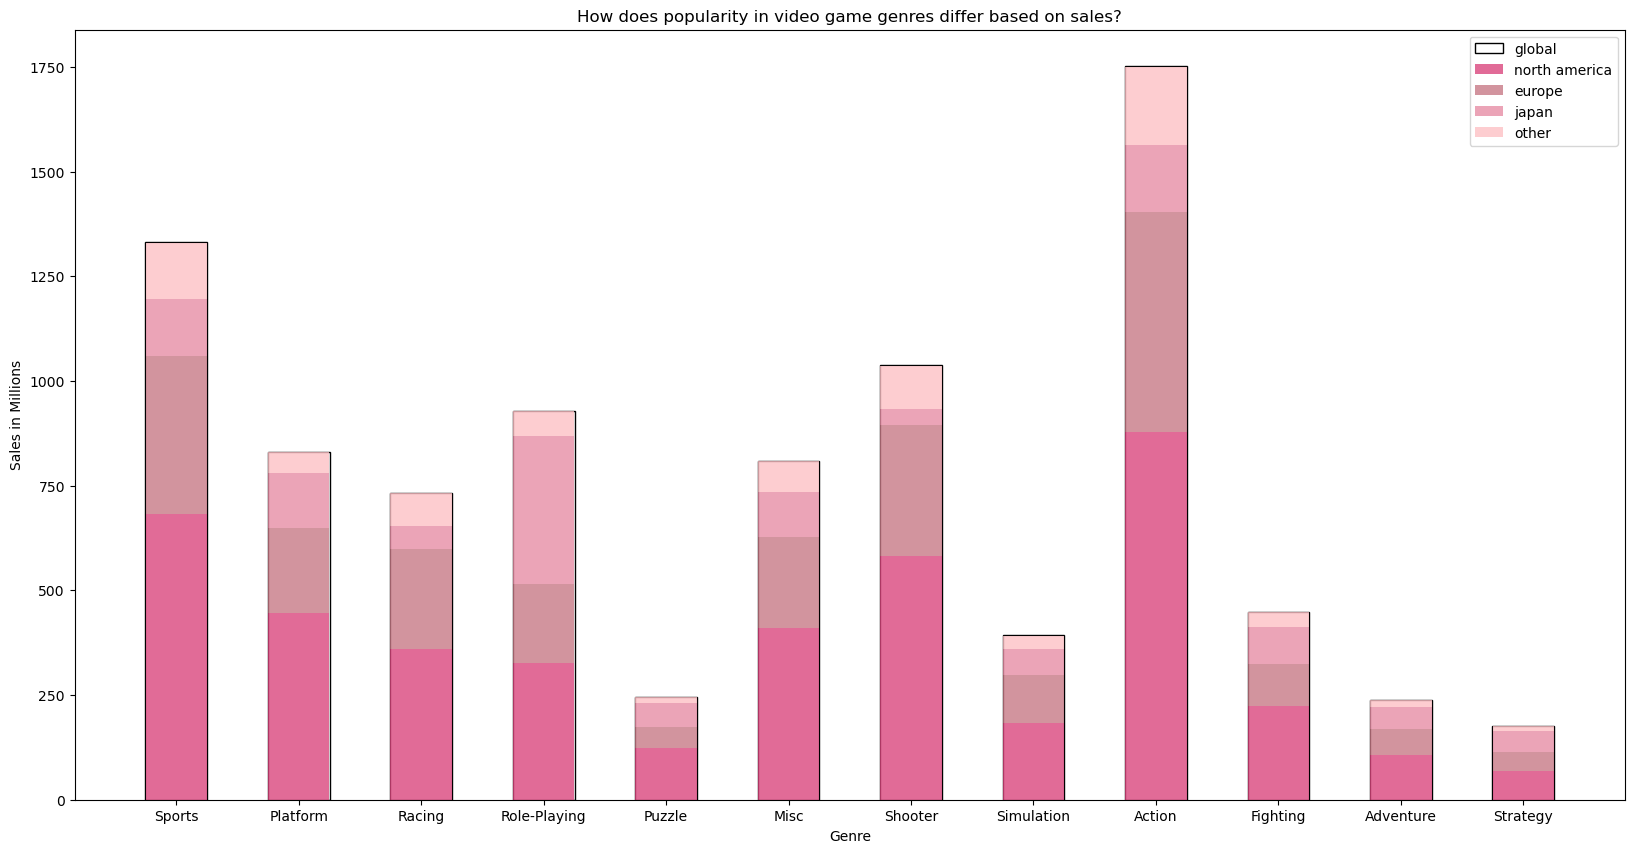

In [29]:
main('global_video_game_sales_in_millions.csv')